# Ejercicios de Regresión y Filtrado de Datos

Este cuaderno contiene ejercicios relacionados con el conjunto de datos de viajes en taxi (`taxi_trip_pricing.csv`).

Se abordarán los siguientes temas:
1. **Regresión Lineal Simple** (Distance vs. Fare Amount)
2. **Filtrado de Datos** para casos de condiciones de tráfico y clima.
3. **Interpretación** de resultados de la regresión.
4. **Imputación de Datos**: Reflexiones y prácticas adicionales.

---

## 1. Preparación del Entorno
En primer lugar, debemos **cargar** las librerías necesarias y **leer** el archivo `taxi_trip_pricing.csv`.

### Tareas de este apartado:
- Instalar o importar **pandas**, **numpy**, **matplotlib** y (opcionalmente) **seaborn**.
- Leer el CSV, guardarlo en un DataFrame `data`.
- Revisar si hay valores nulos y, si lo deseas, imputarlos (por ejemplo, usando la moda o la media, según corresponda).

Rellena la siguiente celda con tu código.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("taxi_trip_pricing.csv")

# Comprobar la forma y valores nulos.

data.isna().sum()

# Imputación 

for column in data.columns:
    mode_value = data[column].mode()[0]  
    data[column] = data[column].fillna(mode_value)
    
print(data.isna().sum())

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


## 2. Regresión Lineal Simple: Distancia vs. Costo

**Objetivo**: Ajustar un **modelo lineal** del tipo 
**Fare Amount** = a + b (**Distance**).

### Pasos sugeridos:
1. Selecciona las columnas **`Distance`** y **`Fare Amount`** de `data`.
2. Realiza un **scatter plot** para visualizar la relación.
3. Usa un método de **regresión lineal**(sin librerias) para obtener los parámetros \(a\) y \(b\).
4. Imprime los resultados y **discute**:
   - ¿Qué significa la pendiente \(b\) en el contexto del precio?
   - ¿Qué representa \(a\)? (el intercepto)

Rellena el siguiente bloque con tu implementación.

In [2]:
# Sugerencia con numpy:
x = data['Trip_Distance_km'].values
y = data['Trip_Price'].values

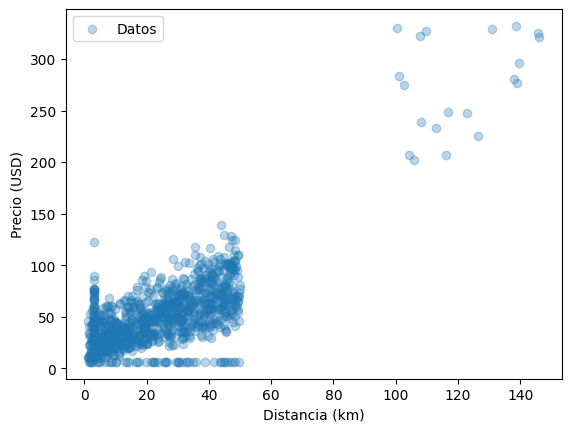

In [3]:
# Visualización con scatter plot.
plt.scatter(x, y, alpha=0.3, label="Datos")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()

### ¿Qué puedes decir de la gráfica?



Dadas las fórmulas dadas en el archivo [RegresiónLineal.md](./../Herramientas_de_Visualizacion/RegresiónLineal.md) podemos crear una función que reciba la lista de datos y regrese los parámetros de la recta.
$$
y=\alpha x+\beta
$$
dados por:
$$
\alpha = \frac{n \sum_{i=1}^n (x_i y_i) - \left( \sum_{i=1}^n x_i \right) \left( \sum_{i=1}^n y_i \right)}{n \sum_{i=1}^n x_i^2 - \left( \sum_{i=1}^n x_i \right)^2},
$$

$$
\beta = \frac{\sum_{i=1}^n y_i - \alpha \sum_{i=1}^n x_i}{n}.
$$

In [ ]:
import numpy as np

def regresion_lineal(x, y):
    n = len(x)
    
    # Calcular las sumas necesarias
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    
    # Calcular beta(pendiente) y alpha (intersección)
    alpha = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    beta = (sum_y - alpha * sum_x) / n
    
    return alpha, beta

# Implementación de la regresión lineal
x = data['Trip_Distance_km'].values
y = data['Trip_Price'].values

alpha, beta = regresion_lineal(x, y)
print(f"Pendiente (alpha): {alpha}")
print(f"Intersección (beta): {beta}")

Pendiente (alpha): 1.597697775333191
Intersección (beta): 13.060447993266099


Ahora veamos los datos con su recta asociada a la regresion:

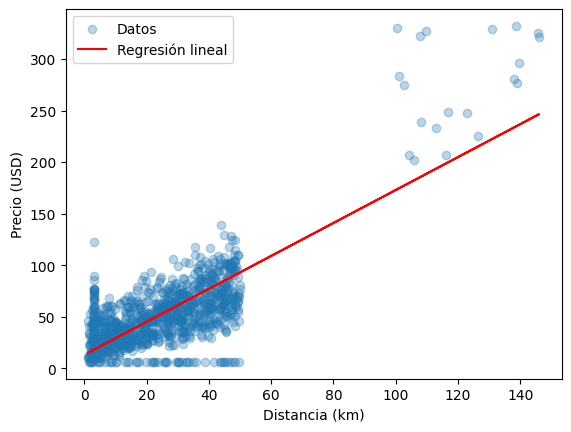

In [8]:
plt.scatter(x, y, alpha=0.3, label="Datos")
plt.plot(x, alpha * x + beta, color="red", label="Regresión lineal")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()

### Regresión con librerias

In [ ]:

# Con sklearn:
""" 
Debemos correr el comando: 
$ pip install scikit-learn
para instalar la librería.
"""
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
print("Intercepto:", model.intercept_)
print("Pendiente:", model.coef_[0])


Intercepto: 13.060447993266116
Pendiente: 1.5976977753331902


## Preguntas de Interpretación
1. **¿Cuál es la pendiente** y cómo la interpretas en términos de dólares por kilómetro?
2. **¿Crees que sea razonable** para viajes muy cortos (cercanos a 0 km)? ¿Qué podría implicar el intercepto?
3. **¿Son realistas** estos parámetros para todo el rango de distancias, o crees que en trayectos muy largos se requeriría un modelo distinto?
4. Con base en tu experiencia con taxis, ¿dónde fallaría el modelo lineal?

Reflexiona brevemente y, si deseas, anota tus comentarios en la siguiente celda.

## 3. Filtrar Datos por Tráfico y Condiciones Climáticas
A veces, los precios dependen no solo de la distancia, sino también de **variables categóricas** como **`Traffic Condition`** o **`Weather Condition`**.

### Ejercicio:
1. Filtra los datos **cuando el tráfico sea intenso**.
2. Realiza **otra** regresión lineal (Distance vs. Fare Amount) **usando solo** los datos filtrados.
3. Compara la **pendiente** con la situación general. ¿Sube o baja el precio por km bajo tráfico intenso?
4. Haz algo similar con una condición climática (por ejemplo, `'Weather_Condition' == 'lluvia'`).

Completa la celda siguiente con tu código y análisis.

#### Tráfico intenso

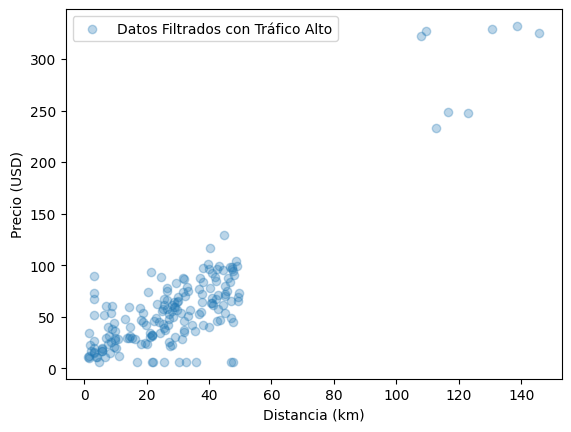

In [ ]:
# Filtrar datos
data_intenso = data[data['Traffic_Conditions'] == 'High']
x_intenso = data_intenso['Trip_Distance_km'].values
y_intenso = data_intenso['Trip_Price'].values

# Aplica un scatter
plt.scatter(x_intenso, y_intenso, alpha=0.3, label="Datos Filtrados con Tráfico Alto")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()


Implementamos la regresión con los datos de Tráfico Alto:

In [ ]:
# Realizar regresiones adicionales

alpha_intenso, beta_intenso = regresion_lineal(x_intenso, y_intenso)
print(f"Pendiente (alpha): {alpha_intenso}")
print(f"Intersección (beta): {beta_intenso}")

Pendiente (alpha): 2.049285347526159
Intersección (beta): -0.7363779400512702


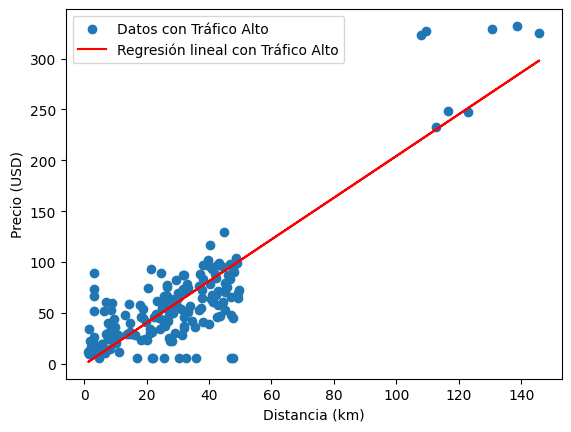

In [ ]:
# Aplica un scatter
plt.scatter(x_intenso, y_intenso, label="Datos con Tráfico Alto")
plt.plot(x_intenso, alpha_intenso * x_intenso + beta_intenso, color="red", label="Regresión lineal con Tráfico Alto")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()

#### Condiciones de lluvia

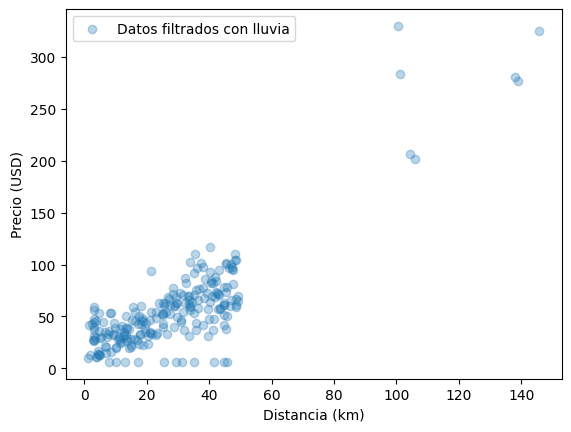

In [ ]:
# Filtrar datos
data_lluvia = data[data['Weather'] == 'Rain']
x_lluvia = data_lluvia['Trip_Distance_km'].values
y_lluvia = data_lluvia['Trip_Price'].values

# Aplica un scatter
plt.scatter(x_lluvia, y_lluvia, alpha=0.3, label="Datos filtrados con lluvia")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()


In [ ]:
# Realizar regresiones adicionales
alpha_lluvia, beta_lluvia = regresion_lineal(x_lluvia, y_lluvia)
print(f"Pendiente (alpha): {alpha_lluvia}")
print(f"Intersección (beta): {beta_lluvia}")

Pendiente (alpha): 1.7969956612187208
Intersección (beta): 6.05614506188547


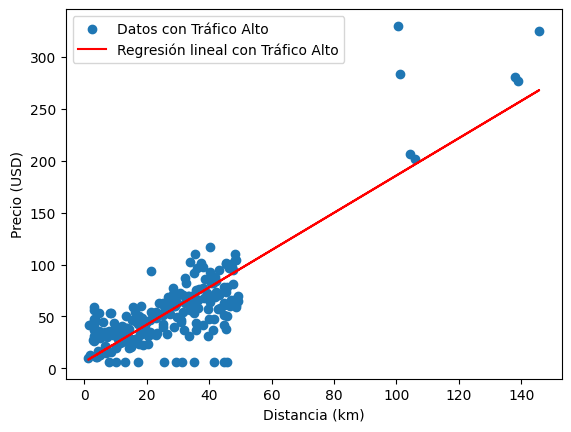

In [ ]:
# Aplica un scatter
plt.scatter(x_lluvia, y_lluvia, label="Datos con Tráfico Alto")
plt.plot(x_lluvia, alpha_lluvia * x_lluvia + beta_lluvia, color="red", label="Regresión lineal con Tráfico Alto")
plt.legend()
plt.xlabel("Distancia (km)")
plt.ylabel("Precio (USD)")
plt.show()

## Interpretación Adicional
1. **¿Cómo cambia** la pendiente (costo por km) cuando se filtra por tráfico bajo?
2. **¿El intercepto** varía significativamente?
3. **¿Crees** que haya interacción con la hora del día o con la duración del viaje?

Puedes anotar tus ideas aquí.

#  Anota conclusiones personales
## (Escribe tu análisis)


## 4. (Opcional) Proponer Variable de Consumo de Combustible
Imagina que, además de la **tarifa** del viaje, se registra un **Consumo de Combustible** (Fuel Consumption) en litros por viaje. ¿Cómo podríamos relacionar esa variable con:
1. **Distance** (podría ser lineal, exponencial o potencia, dependiendo del estilo de conducción, tráfico, etc.)
2. **Trip Duration**
3. **Traffic Condition** (en tráfico intenso, quizás el consumo sea más alto por el ralentí prolongado y arranques frecuentes)

### Preguntas:
- Si **Fuel Consumption** creciera de forma **no lineal** con la distancia (por ejemplo, aumenta más que proporcionalmente en tráfico denso), ¿qué tipo de modelo usarías?
- ¿Te parece más **exponencial** o **potencial**? ¿Por qué?
### Reflexiona sobre la variable "Consumo de Combustible"
Escribe tus reflexiones aquí.

## Conclusiones Generales
En este cuaderno se practicó:
- La **regresión lineal** en un escenario simplificado (Distance vs. Fare).
- El **filtrado** de datos (tráfico intenso, clima lluvioso).
- **Reflexiones** sobre el **consumo de combustible** como variable adicional de posible relación no lineal.
- Un ejercicio opcional de **imputación** de datos para ver cómo afecta a la regresión.

La clave es **interpretar** los resultados y las **limitaciones** de cada modelo y cada estrategia de imputación.